In [1]:
import pandas as pd

In [2]:
ev_df = pd.read_csv('ev-verification.csv')
mx_df = pd.read_csv('max-verification.csv')
gm_df = pd.read_csv('gemini-coding.csv')

In [3]:
print(ev_df.columns)

Index(['link to video', 'timestamp', 'speaker', 'transcript', 'annotations',
       'c1', 'c1-vf', 'c1-ep', 'c2', 'c2-vf', 'c2-ep', 'c3', 'c3-vf', 'c3-ep',
       'c4', 'c4-vf', 'c4-ep', 'notes1', 'notes2'],
      dtype='object')


In [4]:
print(mx_df.columns)

Index(['link to video', 'timestamp', 'speaker', 'transcript', 'annotations',
       'c1', 'c1-vf', 'c1-ep', 'c2', 'c2-vf', 'c2-ep', 'c3', 'c3-vf', 'c3-ep',
       'c4', 'c4-vf', 'c4-ep', 'notes1', 'notes2'],
      dtype='object')


In [5]:
print(ev_df.head())

                                       link to video      timestamp  \
0  https://www.dropbox.com/scl/fi/a16giojo304sdzi...    00:28-00:44   
1                                                NaN    03:00-03:34   
2  https://www.dropbox.com/scl/fi/ddbw29d76zxhwxy...  [07:44-08:47]   
3                                                NaN  [01:00-01:23]   
4                                                NaN  [06:14-07:05]   

                speaker                                         transcript  \
0         Nandita Garud  Okay. So I kind of just took us uh scribe was ...   
1            Mark Mimee  And also to get out the sort of species versus...   
2  Dr. Ali Keshavarzian  The study that you uh mentioned and is publish...   
3    Robin Voigt-Zuwala  Well, that's right. There was one thing somewh...   
4            Mark Mimee  Um and then I guess the last point I want to m...   

                                         annotations  \
0  [{'acknowledge contribution': 'Nandita acknow

In [22]:
from sklearn.metrics import cohen_kappa_score

# Merge on unique identifiers
merged = pd.merge(ev_df, mx_df, on=['transcript', 'timestamp'], suffixes=('_ev', '_mx'))

codes = ['c1', 'c2', 'c3', 'c4']
kappa_results = {}

for code_name in set(merged[[f'{c}_ev' for c in codes] + [f'{c}_mx' for c in codes]].values.flatten()):
    if pd.isna(code_name):
        continue
    ev_vf_list = []
    mx_vf_list = []
    for _, row in merged.iterrows():
        # Find which column in ev and mx has this code_name
        ev_code_col = next((f'{c}_ev' for c in codes if row[f'{c}_ev'] == code_name), None)
        mx_code_col = next((f'{c}_mx' for c in codes if row[f'{c}_mx'] == code_name), None)
        if ev_code_col and mx_code_col:
            ev_vf_col = ev_code_col.replace('_ev', '-vf_ev')
            mx_vf_col = mx_code_col.replace('_mx', '-vf_mx')
            ev_vf = row[ev_vf_col]
            mx_vf = row[mx_vf_col]
            if pd.notna(ev_vf) and pd.notna(mx_vf):
                ev_vf_list.append(ev_vf)
                mx_vf_list.append(mx_vf)
    if ev_vf_list and mx_vf_list:
        print(f"Calculating Cohen's kappa for code '{code_name}', number of valid entries: {len(ev_vf_list)} in ev, {len(mx_vf_list)} in mx")
        kappa = cohen_kappa_score(ev_vf_list, mx_vf_list, weights='quadratic')
        kappa_results[code_name] = kappa

for code, kappa in kappa_results.items():
    print(f"Cohen's kappa for code '{code}': {kappa}")

Calculating Cohen's kappa for code 'express agreement ', number of valid entries: 10 in ev, 10 in mx
Calculating Cohen's kappa for code 'provide supporting evidence', number of valid entries: 33 in ev, 33 in mx
Calculating Cohen's kappa for code 'ask clarifying question', number of valid entries: 18 in ev, 18 in mx
Calculating Cohen's kappa for code 'expand on existing idea', number of valid entries: 67 in ev, 67 in mx
Calculating Cohen's kappa for code 'explain or define term or concept', number of valid entries: 39 in ev, 39 in mx
Calculating Cohen's kappa for code 'encourage particpatioin', number of valid entries: 7 in ev, 7 in mx
Calculating Cohen's kappa for code 'offer constructive criticism', number of valid entries: 3 in ev, 3 in mx
Calculating Cohen's kappa for code 'reject idea', number of valid entries: 1 in ev, 1 in mx
Calculating Cohen's kappa for code 'present new idea', number of valid entries: 36 in ev, 36 in mx
Calculating Cohen's kappa for code 'express frustation', 

/Users/eveyhuang/Documents/NICO/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/eveyhuang/Documents/NICO/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/Users/eveyhuang/Documents/NICO/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/eveyhuang/Documents/NICO/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * co

In [9]:
print(merged.head())

                                    link to video_ev      timestamp  \
0  https://www.dropbox.com/scl/fi/a16giojo304sdzi...    00:28-00:44   
1                                                NaN    03:00-03:34   
2  https://www.dropbox.com/scl/fi/ddbw29d76zxhwxy...  [07:44-08:47]   
3                                                NaN  [01:00-01:23]   
4                                                NaN  [06:14-07:05]   

             speaker_ev                                         transcript  \
0         Nandita Garud  Okay. So I kind of just took us uh scribe was ...   
1            Mark Mimee  And also to get out the sort of species versus...   
2  Dr. Ali Keshavarzian  The study that you uh mentioned and is publish...   
3    Robin Voigt-Zuwala  Well, that's right. There was one thing somewh...   
4            Mark Mimee  Um and then I guess the last point I want to m...   

                                      annotations_ev  \
0  [{'acknowledge contribution': 'Nandita acknow

In [11]:
print(gm_df.columns)

Index(['folder', 'file', 'speaker', 'timestamp', 'transcript',
       'speaking duration', 'nods_others', 'smile_self', 'smile_other',
       'distracted_others', 'hand_gesture', 'interuption', 'overlap',
       'screenshare', 'screenshare_content', 'annotations'],
      dtype='object')


In [12]:
import ast

rows = []
for idx, row in gm_df.iterrows():
    ann = row['annotations']
    # Handle both dict and list of dicts, and skip NaN
    if pd.isna(ann):
        continue
    # Convert string representation to dict/list if necessary
    if isinstance(ann, str):
        try:
            ann = ast.literal_eval(ann)
        except Exception:
            continue
    if isinstance(ann, dict):
        ann_items = ann.items()
    elif isinstance(ann, list):
        ann_items = []
        for d in ann:
            if isinstance(d, dict):
                ann_items.extend(d.items())
    else:
        continue
    for key, value in ann_items:
        rows.append({
            'folder': row['folder'],
            'file': row['file'],
            'timestamp': row['timestamp'],
            'speaker': row['speaker'],
            'ai_code': key,
            'ai_explanation': value
        })

ai_ann_df = pd.DataFrame(rows, columns=['folder', 'file', 'timestamp', 'speaker', 'ai_code', 'ai_explanation'])

In [13]:
print(ai_ann_df.head())

                             folder  \
0  2021MND/output_2021_04_22_MND_S6   
1  2021MND/output_2021_04_22_MND_S6   
2  2021MND/output_2021_04_22_MND_S6   
3  2021MND/output_2021_04_22_MND_S6   
4  2021MND/output_2021_04_22_MND_S6   

                                                file      timestamp  \
0  Breakout_Room_4_Part_2_2021_04_22_13_14_53/Bre...    00:28-00:44   
1  Breakout_Room_4_Part_2_2021_04_22_13_14_53/Bre...    03:00-03:34   
2  Breakout_Room_4_Part_2_2021_04_22_13_14_53/Bre...    03:00-03:34   
3  Breakout_Room_4_Part_2_2021_04_22_13_14_53/Bre...    01:01-02:30   
4  Breakout_Room_4_Part_2_2021_04_22_13_14_53/Bre...  [07:44-08:47]   

                speaker                            ai_code  \
0         Nandita Garud           acknowledge contribution   
1            Mark Mimee  explain or define term or concept   
2            Mark Mimee                   present new idea   
3         Nandita Garud                summarize key ideas   
4  Dr. Ali Keshavarzian     

In [ ]:
# Add new columns to ai_ann_df
ai_ann_df['ev_vf'] = None
ai_ann_df['ev_exp'] = None
ai_ann_df['mx_vf'] = None
ai_ann_df['mx_exp'] = None
ai_ann_df['link to video'] = None
ai_ann_df['ev_notes'] = None
ai_ann_df['mx_notes'] = None

for idx, ann_row in ai_ann_df.iterrows():
    ts = ann_row['timestamp']
    sp = ann_row['speaker']
    code = ann_row['ai_code']

    # Find matching row in ev_df
    ev_match = ev_df[(ev_df['timestamp'] == ts) & (ev_df['speaker'] == sp)]
    if not ev_match.empty:
        for c in ['c1', 'c2', 'c3', 'c4']:
            if ev_match.iloc[0][c] == code:
                ai_ann_df.at[idx, 'ev_vf'] = ev_match.iloc[0][f'{c}-vf']
                ai_ann_df.at[idx, 'ev_exp'] = ev_match.iloc[0].get(f'{c}-ep', None)
                ai_ann_df.at[idx, 'link to video'] = ev_match.iloc[0].get('link to video', None)
                ai_ann_df.at[idx, 'ev_notes'] = str(ev_match.iloc[0]['notes1']) + ' ' + str(ev_match.iloc[0]['notes2'])
                break

    # Find matching row in mx_df
    mx_match = mx_df[(mx_df['timestamp'] == ts) & (mx_df['speaker'] == sp)]
    if not mx_match.empty:
        for c in ['c1', 'c2', 'c3', 'c4']:
            if mx_match.iloc[0][c] == code:
                ai_ann_df.at[idx, 'mx_vf'] = mx_match.iloc[0][f'{c}-vf']
                ai_ann_df.at[idx, 'mx_exp'] = mx_match.iloc[0].get(f'{c}-ep', None)
                ai_ann_df.at[idx, 'mx_notes'] = str(mx_match.iloc[0]['notes1']) + ' ' + str(mx_match.iloc[0]['notes2'])
                break

In [ ]:
ai_ann_df = ai_ann_df[ai_ann_df['ev_vf'].notna() & (ai_ann_df['ev_vf'] != "")]
ai_ann_df.to_csv('all_anno_vf.csv', index=False)

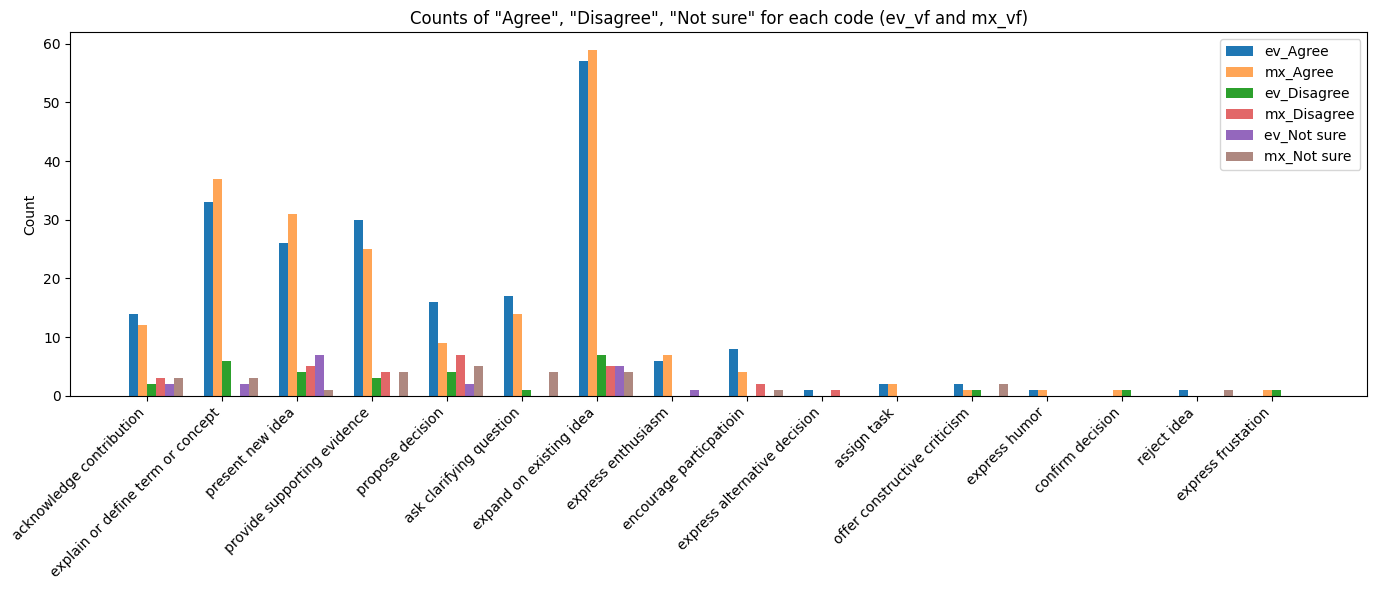

In [37]:
import matplotlib.pyplot as plt

# Get unique codes
codes = ai_ann_df['ai_code'].unique()

# Prepare a DataFrame for counts
count_data = []
for code in codes:
    subset = ai_ann_df[ai_ann_df['ai_code'] == code]
    ev_counts = subset['ev_vf'].value_counts()
    mx_counts = subset['mx_vf'].value_counts()
    count_data.append({
        'code': code,
        'ev_Agree': ev_counts.get('Agree', 0),
        
        'mx_Agree': mx_counts.get('Agree', 0),

        'ev_Disagree': ev_counts.get('Disagree', 0),
        'mx_Disagree': mx_counts.get('Disagree', 0),

        'ev_Not sure': ev_counts.get('Not sure', 0),
        'mx_Not sure': mx_counts.get('Not sure', 0),
    })

counts_df = pd.DataFrame(count_data)

# Plotting
labels = ['Agree', 'Disagree', 'Not sure']
x = range(len(codes))
width = 0.12  # Make bars a bit thinner for clarity

fig, ax = plt.subplots(figsize=(14, 6))

for i, label in enumerate(labels):
    # Plot ev and mx side by side for each label
    ax.bar([p + i*2*width for p in x], counts_df[f'ev_{label}'], width, label=f'ev_{label}')
    ax.bar([p + (i*2+1)*width for p in x], counts_df[f'mx_{label}'], width, label=f'mx_{label}', alpha=0.7)

ax.set_xticks([p + 1.5*width for p in x])
ax.set_xticklabels(codes, rotation=45, ha='right')
ax.set_ylabel('Count')
ax.set_title('Counts of "Agree", "Disagree", "Not sure" for each code (ev_vf and mx_vf)')
ax.legend()
plt.tight_layout()
plt.show()

In [23]:
from sklearn.metrics import cohen_kappa_score

kappa_by_code = {}

for code in ai_ann_df['ai_code'].unique():
    subset = ai_ann_df[ai_ann_df['ai_code'] == code]
    ev_vf = subset['ev_vf']
    mx_vf = subset['mx_vf']
    # Only keep rows where both are not null/empty
    valid = subset[ev_vf.notna() & mx_vf.notna() & (ev_vf != "") & (mx_vf != "")]
    if not valid.empty:
        print(f"Calculating Cohen's kappa for code '{code}', number of valid entries: {len(valid)}")
        kappa = cohen_kappa_score(valid['ev_vf'], valid['mx_vf'], weights='quadratic')
        kappa_by_code[code] = kappa

for code, kappa in kappa_by_code.items():
    print(f"Cohen's kappa for code '{code}': {kappa}")

Calculating Cohen's kappa for code 'acknowledge contribution', number of valid entries: 18
Calculating Cohen's kappa for code 'explain or define term or concept', number of valid entries: 40
Calculating Cohen's kappa for code 'present new idea', number of valid entries: 37
Calculating Cohen's kappa for code 'provide supporting evidence', number of valid entries: 33
Calculating Cohen's kappa for code 'propose decision', number of valid entries: 21
Calculating Cohen's kappa for code 'ask clarifying question', number of valid entries: 18
Calculating Cohen's kappa for code 'expand on existing idea', number of valid entries: 68
Calculating Cohen's kappa for code 'express enthusiasm', number of valid entries: 7
Calculating Cohen's kappa for code 'encourage particpatioin', number of valid entries: 7
Calculating Cohen's kappa for code 'express alternative decision', number of valid entries: 1
Calculating Cohen's kappa for code 'assign task', number of valid entries: 2
Calculating Cohen's kappa

/Users/eveyhuang/Documents/NICO/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/eveyhuang/Documents/NICO/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/Users/eveyhuang/Documents/NICO/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/eveyhuang/Documents/NICO/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * co

In [25]:
# Calculate simple agreement for each unique code in ai_ann_df['ai_code']
simple_agreement = {}

for code in ai_ann_df['ai_code'].unique():
    subset = ai_ann_df[ai_ann_df['ai_code'] == code]
    # Only keep rows where both are not null/empty
    valid = subset[subset['ev_vf'].notna() & subset['mx_vf'].notna() & (subset['ev_vf'] != "") & (subset['mx_vf'] != "")]
    if not valid.empty:
        agreement = (valid['ev_vf'] == valid['mx_vf']).sum() / len(valid)
        simple_agreement[code] = agreement

for code, agreement in simple_agreement.items():
    print(f"Simple agreement for code '{code}': {agreement:.3f}")

Simple agreement for code 'acknowledge contribution': 0.667
Simple agreement for code 'explain or define term or concept': 0.825
Simple agreement for code 'present new idea': 0.649
Simple agreement for code 'provide supporting evidence': 0.727
Simple agreement for code 'propose decision': 0.476
Simple agreement for code 'ask clarifying question': 0.778
Simple agreement for code 'expand on existing idea': 0.735
Simple agreement for code 'express enthusiasm': 0.857
Simple agreement for code 'encourage particpatioin': 0.571
Simple agreement for code 'express alternative decision': 0.000
Simple agreement for code 'assign task': 1.000
Simple agreement for code 'offer constructive criticism': 0.333
Simple agreement for code 'express humor': 1.000
Simple agreement for code 'confirm decision': 0.000
Simple agreement for code 'reject idea': 0.000
Simple agreement for code 'express frustation': 0.000


In [27]:
# Create a DataFrame to display kappa scores and simple agreement scores
scores_table = pd.DataFrame({
    'Code': kappa_by_code.keys(),
    "Cohen's Kappa": kappa_by_code.values(),
    'Simple Agreement': simple_agreement.values()
})

# apply gradient to the cell backgrounds
styled_table = (scores_table.round(3)).style.background_gradient(cmap='RdYlGn')

styled_table

,Code,Cohen's Kappa,Simple Agreement
0,acknowledge contribution,0.211000,0.667000
1,explain or define term or concept,0.417000,0.825000
2,present new idea,-0.082000,0.649000
3,provide supporting evidence,-0.009000,0.727000
4,propose decision,0.117000,0.476000
5,ask clarifying question,0.193000,0.778000
6,expand on existing idea,-0.012000,0.735000
7,express enthusiasm,0.000000,0.857000
8,encourage particpatioin,0.000000,0.571000
9,express alternative decision,0.000000,0.000000


In [29]:
# Count rows where both ev_vf and mx_vf are 'Disagree'
both_disagree = ai_ann_df[(ai_ann_df['ev_vf'] == 'Disagree') & (ai_ann_df['mx_vf'] == 'Disagree')]
num_both_disagree = len(both_disagree)
total_rows = len(ai_ann_df)
percentage = (num_both_disagree / total_rows) * 100 if total_rows > 0 else 0

print(f"Number of rows where both ev_vf and mx_vf are 'Disagree': {num_both_disagree}")
print(f"Percentage of such rows: {percentage:.2f}%")
both_disagree.to_excel('both_disagree.xlsx', index=False)

Number of rows where both ev_vf and mx_vf are 'Disagree': 7
Percentage of such rows: 2.66%


In [31]:
# Find codes with simple agreement score equal to zero
zero_agreement_codes = [code for code, score in simple_agreement.items() if score <= 0.6]

# Filter ai_ann_df for those codes
zero_agreement_rows = ai_ann_df[ai_ann_df['ai_code'].isin(zero_agreement_codes)]
zero_agreement_rows.to_excel('low_agreement_rows.xlsx', index=False)

In [34]:
# Count rows where either ev_vf or mx_vf is 'Disagree'
either_disagree = ai_ann_df[(ai_ann_df['ev_vf'] == 'Disagree') | (ai_ann_df['mx_vf'] == 'Disagree')]
num_either_disagree = len(either_disagree)
total_rows = len(ai_ann_df)
percentage = (num_either_disagree / total_rows) * 100 if total_rows > 0 else 0

print(f"Number of rows where either ev_vf and mx_vf are 'Disagree': {num_either_disagree}")
print(f"Percentage of such rows: {percentage:.2f}%")
either_disagree.to_excel('either_disagree.xlsx', index=False)

Number of rows where either ev_vf and mx_vf are 'Disagree': 50
Percentage of such rows: 19.01%
